### Machine Learning Lab05 Exercise: Iris Classification
This lab introduces classical machine learning algorithms, decision trees (DTs) and their ensemble learning (e.g., Random Forests). Decision trees are important non-parameter learning methods. Although DTs are simple and limited, they still can achieve excellent performance using ensemble learning schemes.

For this lab assignment, we'll use the algorithms we've learned today to fit the model and evaluate the model’s prediction performance. The scikit-learn package will be used to save your time.


### Decision tree
- <font size=4>Step 1. load iris dataset </font>

Datasets: First, we load the scikit-learn iris toy dataset .

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

iris = datasets.load_iris()

- <font size=4> Step 2. Define the features and the target </font>

In [9]:
X = iris.data[:, 2:]
y = iris.target

- <font size=4> Step 3. Visualization </font>
  
    We need to use proper visualization methods to have an intuitive understanding.

    For visualization, only the last 2 attributes are used.

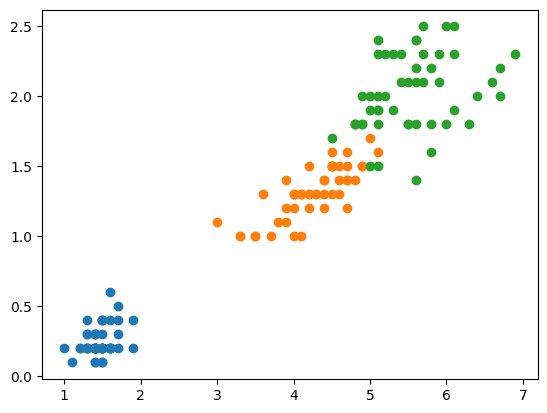

In [10]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

In [11]:
########### Write Your Code Here ###########
print(iris.feature_names)
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()
############################################

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- <font size=4> Step 4. Preprocessing data </font>
Please check whether the data needs to be preprocessed

In [12]:
########### Write Your Code Here ###########
"""
No need to preprocessing.
"""
############################################

'\nNo need to preprocessing.\n'

- <font size=4> Step 5. Split the dataset into train and test sets </font>
  
 Now we divide the whole dataset into a training set and a test set using the the scikit-learn model_selection module.

In [13]:
########### Write Your Code Here ###########
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)
############################################

- <font size=4> Step 6. Explore the model parameters </font>

  Decision trees are quite easy to use, but they are prone to overfit the training data. Actually almost all the non-parameter learning methods suffer from this problem. We can use pruning to optimize our trained decision trees; we can also adjust the super parameters to avoid overfitting.

  The decision tree model  given by the `SkLearn`  is as follows:

  ```python
  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
  ```

  There are so many arguments and they are all helpful in adjusting the algorithm parameters to achieve the balance between bias and variance.  
  Adjust these parameters: `criterion`,`max_depth`, `min_samples_leaf`,  `min_samples_split` , `max_leaf_nodes `,`min_impurity_split `
  and explain how it affects the bias and variance of the classification results.

In [27]:
########### Write Your Code Here ###########
from sklearn.model_selection import cross_val_score
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


def evaluate_model(model):
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model,
        X_train,
        y_train,
        X_test,
        y_test,
        loss="0-1_loss",
        random_seed=123,
        num_rounds=10,
    )
    return (
        avg_expected_loss,
        avg_bias,
        avg_var,
        cross_val_score(model, X, y, cv=5, scoring="f1_macro"),
    )


best = 0
best_model = 0
best_param = []

for cri in ["gini", "entropy"]:
    for md in range(5, 55, 5):
        for msl in (2, 100, 10):
            for mss in range(2, 100, 10):
                for msn in range(2, 100, 10):
                    model = DecisionTreeClassifier(
                        criterion=cri,
                        max_depth=md,
                        min_samples_leaf=msl,
                        min_samples_split=mss,
                        max_leaf_nodes=msn,
                    )
                    model.fit(X_train, y_train)
                    l, b, v, cross = evaluate_model(model)
                    if cross.mean() > best:
                        best = cross.mean()
                        best_model = model
                        best_param = [cri, md, msl, mss, msn]
                        print(evaluate_model(best_model), flush=True)
                        print(best_param, flush=True)


############################################

(0.33333333333333337, 0.3333333333333333, 0.2666666666666667, array([0.55555556, 0.55555556, 0.55555556, 0.55555556, 0.55555556]))
['gini', 5, 2, 2, 2]


(0.07333333333333333, 0.06666666666666667, 0.04, array([0.96658312, 0.96658312, 0.93265993, 0.89769821, 1.        ]))
['gini', 5, 2, 2, 12]
(0.07666666666666667, 0.1, 0.04333333333333333, array([0.96658312, 0.96658312, 0.93265993, 0.93265993, 1.        ]))
['gini', 5, 2, 42, 22]


1. `criterion`:
   - Gini (`criterion='gini'`) generally tends to create more complex trees and might lead to overfitting, increasing variance.
   - Entropy (`criterion='entropy'`) tends to create slightly less complex trees, which may help reduce variance and increase bias.

2. `max_depth`: the maximum depth of the decision tree. A smaller value limits the tree's depth, which can decrease variance while increasing bias. 

3. `min_samples_leaf`: This parameter sets the minimum number of samples required to be at a leaf node. Increasing this value can make the tree less complex, reducing variance and increasing bias.

4. `min_samples_split`: the minimum number of samples required to split an internal node. Increasing this value can lead to higher bias and lower variance.

5. `max_leaf_nodes`: the maximum number of leaf nodes in the tree. Lower values will lead to increasing bias and reducing variance.

6. `min_impurity_split`: the minimum impurity decrease required to split a node. Increasing this value can lead to higher bias and lower variance.

Finally, select the best set of parameters for the following steps.
- <font size=4> Step 7. Use the model of your choice on the test set </font>


In [28]:
########### Write Your Code Here ###########
model = DecisionTreeClassifier(
                        criterion='gini',
                        max_depth=5,
                        min_samples_leaf=2,
                        min_samples_split=42,
                        max_leaf_nodes=22,
                    )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
############################################

- <font size=4> Step 8. Evaluate the model </font>

In [29]:
########### Write Your Code Here ###########
from sklearn.metrics import accuracy_score, classification_report

report = classification_report(y_test, y_pred)
print("DT Classification Report:\n", report)
score = cross_val_score(model, X, y, cv=5, scoring="f1_macro")
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))
############################################

DT Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

0.96 accuracy with a standard deviation of 0.03


- <font size=4> Step 9. Visual decision boundary and generated decision tree </font>

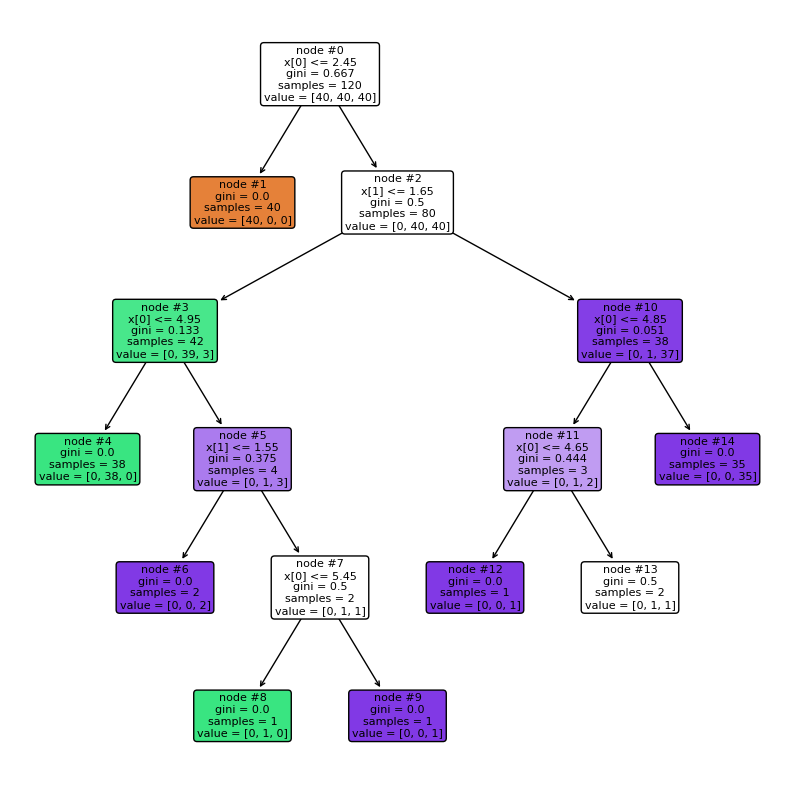

In [17]:
########### Write Your Code Here ###########
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 10))
plot_tree(
    model,
    node_ids=True,
    filled=True,
    rounded=True,
    fontsize=8,
)

plt.show()
############################################

### Random forest

In this section, you are required to use random forests for classification. Thus, in `scikit-learn`, there are two ways to implement a random forset, from the Bagging view and from the RF view.<br>
Classify `iris`  using `BaggingClassifier( )` and `RandomForestClassifier( )` respectively, 

- <font color=blue >**RF view:**</font> we construct a RF class directly.
  
```python
# Use Random Forest directly

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=300,
                                random_state=666, # random attributes subset
                                oob_score=True,
                                # n_jobs=-1
                               )
rf_clf.fit(X,y)
```

- <font color=blue face=雅黑>**Bagging view:**</font>  we use the bagging algorithm with a number of base learning algorithms of decision trees.
  
```python
# Use Random Forest from Bagging view

from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=300,
                                max_samples=300,
                                bootstrap=True, # using bootstrap sampling method
                                oob_score=True, # use oob data for scoring
                                # n_jobs=-1 # use paralell computing
                               )
bagging_clf.fit(X,y)
```

- Compare the performances of two  methods, and select different parameters for model  and evaluate the model using bias and variance




In [22]:
########### Write Your Code Here ###########
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,  # random attributes subset
    oob_score=True,
    # n_jobs=-1
)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
report = classification_report(y_test, y_pred)
print("RF Report:\n", report)
score = cross_val_score(rf_clf, X, y, cv=5, scoring="f1_macro")
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))
############################################

RF Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

0.97 accuracy with a standard deviation of 0.02


In [24]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=300,
    bootstrap=True,  # using bootstrap sampling method
    oob_score=True,  # use oob data for scoring
    random_state=42,
)
bagging_clf.fit(X, y)
y_pred = bagging_clf.predict(X_test)
report = classification_report(y_test, y_pred)
print("Bagging Report:\n", report)
score = cross_val_score(bagging_clf, X, y, cv=5, scoring="f1_macro")
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

Bagging Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

0.96 accuracy with a standard deviation of 0.03


### Other ensemble learning
For classification, we have many models to choose . Please don't just pick a model to train and say it's good enough. We need to select models based on some metrics, such as choosing models with low bias and low variance.

In this part, you are required  to use `AdaBoost` and `Gradient boosting`.Compare their performances with decision tree and random forest, and finally select the best model  and the optimal  parameters for iris classification.




In [25]:
########### Write Your Code Here ###########
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    n_estimators=300,
    algorithm="SAMME.R",
    learning_rate=1,
    random_state=42,
)
ada_clf.fit(X, y)
y_pred = ada_clf.predict(X_test)
report = classification_report(y_test, y_pred)
print("AdaBoost Report:\n", report)
score = cross_val_score(ada_clf, X, y, cv=5, scoring="f1_macro")
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

from sklearn.ensemble import GradientBoostingClassifier

grad_clf = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.1,
    random_state=42,
)
grad_clf.fit(X, y)
y_pred = grad_clf.predict(X_test)
report = classification_report(y_test, y_pred)
print("GradBoost Report:\n", report)
score = cross_val_score(grad_clf, X, y, cv=5, scoring="f1_macro")
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))
############################################

AdaBoost Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

0.95 accuracy with a standard deviation of 0.03
GradBoost Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

0.96 accuracy with a standard deviation of 0.03



<font size=4>Hint: About how to select models and parameters:</font>
- Select model using cross validation. Compare the scores in the training set and the validation set. If they are good enough, use the model in the test set.
- Calculate the bias and variance of each model to further analyze your chosen model.
- Select parameters using cross validation
  
### Questions:
(1) Can decision trees and random forests be used for unsupervised clustering or data dimension reduction? Why?

(2) What are the strengths of the decision tree/random forest methods; when do they perform well?

(3) What are the weaknesses of the decision tree/random forest methods; when do they perform poorly?

(4) What makes the decision tree/random forest a good candidate for the classification/regression problem, if you have enough knowledge about the data?

(1) No. Decision trees and random forests are used to learn decision boundaries and relationships between input features and target labels.

(2) Strengths of Decision Trees and Random Forests:

   - **Interpretability**: Decision trees are easy to understand and visualize, making them useful for explaining the reasoning behind predictions.
   - **Non-linearity Handling**: They can capture non-linear relationships between features and the target, making them suitable for a wide range of problems.
   - **Ensemble Learning**: Random forests, which are an ensemble of decision trees, can improve predictive performance and reduce overfitting.
   - **Handling Mixed Data Types**: They can handle both categorical and numerical features without the need for feature engineering.

   Decision trees and random forests perform well when the data is not too noisy, and when the relationships between features and target are relatively simple. Random forests are particularly good at handling high-dimensional data.

(3) Weaknesses of Decision Trees and Random Forests:

   - **Overfitting**: Decision trees can easily overfit the training data, creating very complex trees that generalize poorly to unseen data. Random forests mitigate this but can still overfit if not properly tuned.
   - **Bias Towards Dominant Classes**: They tend to favor dominant classes in imbalanced datasets, which can lead to misclassification of minority classes.
   - **Limited Extrapolation**: Decision trees and random forests are less suitable for extrapolation, as they tend to make predictions within the range of the training data.
   - **Sensitivity to Noisy Data**: Decision trees are sensitive to noisy data, which can lead to erratic splits and less reliable models.

   Decision trees and random forests may perform poorly when the data is noisy, the relationships between features and target are highly complex, or when the dataset is imbalanced.

(4) Decision trees and random forests can be good candidates for classification and regression problems when you have enough knowledge about the data because of the following reasons:

   - **Interpretability**: Decision trees provide clear, human-interpretable rules, which can help in understanding the decision-making process.
   - **Feature Importance**: Random forests can provide information about the importance of each feature, helping in feature selection.
   - **Ensemble Benefits**: Random forests combine multiple decision trees, reducing overfitting and improving generalization.
   - **Flexibility**: Decision trees and random forests can handle a mix of data types and both categorical and numerical features.

However, it's crucial to carefully tune hyperparameters, address potential overfitting, and consider the limitations mentioned earlier to ensure the model's effectiveness. In some cases, other algorithms like gradient boosting, support vector machines, or neural networks might outperform decision trees and random forests.

## Conclusion
- Decision trees are prone to overfitting, but random forest algorithm prevents overfitting.
- Random forest algorithm is comparatively time-consuming, whereas decision tree algorithm gives fast results.
- There are many arguments for either base decision trees or the whole ensemble algorithm.  A good ensemble algorithm should make sure that base ones are both accurate and diversified.  So it is better to get a set of good enough base tree parameters before training the ensemble learning algorithm. 

## References
https://scikit-learn.org/stable/